In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

sns.set(rc={'figure.figsize':(20, 20)})

In [15]:
data = pd.read_csv('../data/full_trains.csv')

In [16]:
data

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,NaN,10,...,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,2018,9,NaN,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,NaN,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0
5459,2018,9,NaN,PARIS MONTPARNASSE,TOURS,78.931818,176,0,NaN,24,...,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0
5460,2018,9,NaN,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,NaN,15,...,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,4.0,2.421278,0.0,0.0


In [17]:
data.service.dropna()

0            National
1            National
2            National
3            National
4            National
            ...      
4898         National
4899    International
5248    International
5249    International
5250    International
Name: service, Length: 4032, dtype: object

In [18]:
data[data.service.isna()].departure_station.unique()

array(['PARIS MONTPARNASSE', 'TOURS', 'LYON PART DIEU', 'PARIS EST',
       'NANCY', 'STRASBOURG', 'NANTES', 'DUNKERQUE',
       'MARSEILLE ST CHARLES', 'BORDEAUX ST JEAN', 'ANGERS SAINT LAUD',
       'POITIERS', 'VANNES', 'ANGOULEME', 'LA ROCHELLE VILLE', 'RENNES',
       'TOURCOING', 'MARNE LA VALLEE', 'PARIS LYON',
       'BESANCON FRANCHE COMTE TGV', 'DIJON VILLE', 'MULHOUSE VILLE',
       'NIMES', 'TOULON', 'ITALIE', 'LE MANS', 'METZ',
       'ST PIERRE DES CORPS', 'PARIS NORD',
       'LE CREUSOT MONTCEAU MONTCHANIN', 'BELLEGARDE (AIN)', 'LAVAL',
       'SAINT ETIENNE CHATEAUCREUX', 'PERPIGNAN', 'PARIS VAUGIRARD',
       'CHAMBERY CHALLES LES EAUX', 'ANNECY', 'MONTPELLIER', 'QUIMPER',
       'GENEVE', 'LAUSANNE', 'BARCELONA', 'TOULOUSE MATABIAU', 'DOUAI',
       'LILLE', 'NICE VILLE', 'VALENCE ALIXAN TGV', 'FRANCFORT',
       'STUTTGART', 'BREST', 'MACON LOCHE', 'ZURICH', 'MADRID', 'REIMS',
       'AIX EN PROVENCE TGV', 'ARRAS', 'AVIGNON TGV', 'GRENOBLE',
       'ST MALO'], dtype

In [19]:
data[data.service.isna()].year.unique()

array([2018], dtype=int64)

In [20]:
data[data.service == 'International'].year.unique()

array([2017, 2015, 2016], dtype=int64)

In [21]:
data[data.service == 'International'].arrival_station.unique()

array(['FRANCFORT', 'LAUSANNE', 'ZURICH', 'PARIS LYON', 'STUTTGART',
       'GENEVE', 'PARIS EST', 'ITALIE'], dtype=object)

In [22]:
data_paris = data[data.departure_station.str.contains('PARIS')]
data_paris = data_paris.append(data[data.arrival_station.str.contains('PARIS')])

In [23]:
inter_cities = ['FRANCFORT', 'ZURICH', 'STUTTGART', 'LAUSANNE', 'ITALIE', 'BARCELONA']
for i in range(len(data_paris)):
    if pd.isnull(data_paris.iloc[i].service):
        if (data_paris.iloc[i].arrival_station in inter_cities) or (data_paris.iloc[i].departure_station in inter_cities):
            data_paris.iat[i, 2] = 'International'
        else:
            data_paris.iat[i, 2] = 'National'

In [24]:
data[data.departure_station == 'BARCELONA']

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
3770,2018,4,NaN,BARCELONA,PARIS LYON,390.600000,43,18,NaN,8,...,0.400000,0.400000,0.000000,0.200000,0.0,0.0,5.0,8.166000,1.0,1.0
4096,2018,2,NaN,BARCELONA,PARIS LYON,390.500000,56,0,NaN,17,...,0.454545,0.272727,0.000000,0.272727,0.0,0.0,11.0,7.836310,7.0,2.0
4120,2018,6,NaN,BARCELONA,PARIS LYON,300.905114,99,11,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,14.290530,17.0,7.0
4146,2018,5,NaN,BARCELONA,PARIS LYON,295.304301,74,12,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,5.644355,6.0,0.0
4184,2018,1,NaN,BARCELONA,PARIS LYON,390.428571,35,0,NaN,10,...,0.142857,0.142857,0.142857,0.571429,0.0,0.0,7.0,9.219048,3.0,3.0
5021,2018,3,NaN,BARCELONA,PARIS LYON,390.517241,58,0,NaN,23,...,0.750000,0.125000,0.125000,0.000000,0.0,0.0,9.0,6.961207,4.0,3.0
5056,2018,8,NaN,BARCELONA,PARIS LYON,315.753216,115,1,NaN,66,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,12.986404,14.0,7.0
5071,2018,7,NaN,BARCELONA,PARIS LYON,316.889516,124,0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,37.0,16.495430,16.0,10.0
5117,2018,10,NaN,BARCELONA,PARIS LYON,378.116398,65,3,NaN,24,...,0.400000,0.400000,0.066667,0.133333,0.0,0.0,14.0,21.140323,11.0,6.0
5271,2018,9,NaN,BARCELONA,PARIS LYON,379.249444,60,0,NaN,31,...,0.200000,0.400000,0.100000,0.300000,0.0,0.0,11.0,12.528333,9.0,5.0


In [25]:
np.count_nonzero(data[data.year != 2018].service.isna())

0

In [26]:
test = data_paris[data_paris.year==2018]
test[test.service=='International']

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
3713,2018,6,International,PARIS LYON,BARCELONA,303.852907,97,11,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,13.709302,12.0,3.0
3766,2018,4,International,PARIS EST,FRANCFORT,193.348134,168,34,NaN,23,...,0.055556,0.166667,0.166667,0.500000,0.111111,0.000000,21.0,9.169403,11.0,2.0
3795,2018,1,International,PARIS LYON,ZURICH,241.648111,153,3,NaN,25,...,0.178571,0.214286,0.250000,0.214286,0.035714,0.107143,28.0,7.782444,11.0,3.0
3797,2018,1,International,PARIS EST,STUTTGART,186.675166,155,4,NaN,20,...,0.266667,0.066667,0.200000,0.466667,0.000000,0.000000,15.0,5.728366,6.0,2.0
3799,2018,1,International,PARIS EST,FRANCFORT,226.227333,177,2,NaN,19,...,0.300000,0.300000,0.250000,0.150000,0.000000,0.000000,20.0,7.836381,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,2018,11,International,FRANCFORT,PARIS EST,218.271414,171,6,NaN,69,...,0.285714,0.142857,0.380952,0.190476,0.000000,0.000000,18.0,7.259596,7.0,2.0
5388,2018,11,International,ITALIE,PARIS LYON,446.004762,92,1,NaN,74,...,0.333333,0.181818,0.393939,0.060606,0.000000,0.030303,33.0,14.423443,15.0,5.0
5414,2018,10,International,STUTTGART,PARIS EST,191.447241,151,0,NaN,137,...,0.117647,0.000000,0.117647,0.529412,0.000000,0.235294,17.0,7.214680,8.0,3.0
5415,2018,10,International,ITALIE,PARIS LYON,439.148936,95,1,NaN,87,...,0.161290,0.193548,0.387097,0.193548,0.032258,0.032258,32.0,18.114007,11.0,4.0


In [27]:
data.departure_station.unique()

array(['PARIS EST', 'REIMS', 'PARIS LYON', 'CHAMBERY CHALLES LES EAUX',
       'LYON PART DIEU', 'MONTPELLIER', 'MULHOUSE VILLE',
       'PARIS MONTPARNASSE', 'BORDEAUX ST JEAN', 'LA ROCHELLE VILLE',
       'POITIERS', 'VANNES', 'LILLE', 'ANGERS SAINT LAUD', 'DOUAI',
       'MACON LOCHE', 'MARSEILLE ST CHARLES', 'NANCY', 'PARIS NORD',
       'PERPIGNAN', 'RENNES', 'SAINT ETIENNE CHATEAUCREUX',
       'ST PIERRE DES CORPS', 'VALENCE ALIXAN TGV', 'LAVAL', 'NANTES',
       'QUIMPER', 'TOULOUSE MATABIAU', 'ZURICH', 'METZ', 'AVIGNON TGV',
       'LE MANS', 'ITALIE', 'BESANCON FRANCHE COMTE TGV', 'NIMES',
       'ANGOULEME', 'ST MALO', 'TOURS', 'ARRAS', 'STUTTGART', 'GENEVE',
       'DIJON VILLE', 'TOULON', 'DUNKERQUE', 'BELLEGARDE (AIN)', 'BREST',
       'ANNECY', 'GRENOBLE', 'LE CREUSOT MONTCEAU MONTCHANIN',
       'FRANCFORT', 'STRASBOURG', 'LAUSANNE', 'AIX EN PROVENCE TGV',
       'NICE VILLE', 'TOURCOING', 'MARNE LA VALLEE', 'PARIS VAUGIRARD',
       'BARCELONA', 'MADRID'], dtype=object

In [28]:
data.arrival_station.unique()

array(['METZ', 'PARIS EST', 'STRASBOURG', 'AVIGNON TGV',
       'BELLEGARDE (AIN)', 'BESANCON FRANCHE COMTE TGV', 'PARIS LYON',
       'GRENOBLE', 'MACON LOCHE', 'MARSEILLE ST CHARLES',
       'MULHOUSE VILLE', 'ANGERS SAINT LAUD', 'PARIS MONTPARNASSE',
       'POITIERS', 'RENNES', 'FRANCFORT', 'LAUSANNE', 'PARIS NORD',
       'LILLE', 'NANCY', 'LE CREUSOT MONTCEAU MONTCHANIN', 'NICE VILLE',
       'ZURICH', 'NANTES', 'VANNES', 'DOUAI', 'DUNKERQUE',
       'LYON PART DIEU', 'DIJON VILLE', 'PERPIGNAN', 'TOULOUSE MATABIAU',
       'ARRAS', 'REIMS', 'NIMES', 'TOULON', 'BORDEAUX ST JEAN', 'LE MANS',
       'STUTTGART', 'GENEVE', 'ANGOULEME', 'VALENCE ALIXAN TGV', 'ITALIE',
       'MONTPELLIER', 'ST MALO', 'BREST', 'LA ROCHELLE VILLE',
       'AIX EN PROVENCE TGV', 'LAVAL', 'QUIMPER', 'ANNECY',
       'CHAMBERY CHALLES LES EAUX', 'ST PIERRE DES CORPS',
       'SAINT ETIENNE CHATEAUCREUX', 'TOURS', 'TOURCOING', 'BARCELONA',
       'PARIS VAUGIRARD', 'MARNE LA VALLEE', 'MADRID'], dtype=object

In [29]:
data_paris

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
5,2017,9,National,PARIS LYON,BESANCON FRANCHE COMTE TGV,128.521053,191,1,NaN,18,...,0.111111,0.111111,0.222222,0.500000,0.000000,0.055556,15.0,35.796667,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,2018,9,International,LAUSANNE,PARIS LYON,219.325884,133,1,NaN,95,...,0.222222,0.111111,0.333333,0.222222,0.111111,0.000000,10.0,3.022727,4.0,1.0
5454,2018,9,National,LE MANS,PARIS MONTPARNASSE,61.261097,383,0,NaN,216,...,0.017544,0.228070,0.350877,0.192982,0.105263,0.105263,22.0,4.087946,4.0,1.0
5457,2018,9,National,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0


In [30]:
data_paris[data_paris.service == 'International']

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
22,2017,9,International,PARIS EST,FRANCFORT,128.124183,153,0,NaN,25,...,0.090909,0.363636,0.181818,0.181818,0.181818,0.000000,14.0,30.078571,6.0,0.0
23,2017,9,International,PARIS LYON,LAUSANNE,219.950952,141,1,NaN,13,...,0.095238,0.190476,0.285714,0.380952,0.000000,0.047619,19.0,34.937719,6.0,2.0
37,2017,1,International,PARIS LYON,ZURICH,177.990559,143,0,NaN,12,...,0.090909,0.318182,0.272727,0.272727,0.000000,0.045455,15.0,42.733333,5.0,2.0
62,2017,7,International,PARIS LYON,ZURICH,224.140940,149,0,NaN,30,...,0.300000,0.100000,0.050000,0.500000,0.050000,0.000000,20.0,45.595833,12.0,6.0
84,2015,3,International,PARIS EST,STUTTGART,146.129167,120,0,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,41.000000,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,2018,11,International,FRANCFORT,PARIS EST,218.271414,171,6,NaN,69,...,0.285714,0.142857,0.380952,0.190476,0.000000,0.000000,18.0,7.259596,7.0,2.0
5388,2018,11,International,ITALIE,PARIS LYON,446.004762,92,1,NaN,74,...,0.333333,0.181818,0.393939,0.060606,0.000000,0.030303,33.0,14.423443,15.0,5.0
5414,2018,10,International,STUTTGART,PARIS EST,191.447241,151,0,NaN,137,...,0.117647,0.000000,0.117647,0.529412,0.000000,0.235294,17.0,7.214680,8.0,3.0
5415,2018,10,International,ITALIE,PARIS LYON,439.148936,95,1,NaN,87,...,0.161290,0.193548,0.387097,0.193548,0.032258,0.032258,32.0,18.114007,11.0,4.0


In [31]:
data_paris[data_paris.service=='International']

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
22,2017,9,International,PARIS EST,FRANCFORT,128.124183,153,0,NaN,25,...,0.090909,0.363636,0.181818,0.181818,0.181818,0.000000,14.0,30.078571,6.0,0.0
23,2017,9,International,PARIS LYON,LAUSANNE,219.950952,141,1,NaN,13,...,0.095238,0.190476,0.285714,0.380952,0.000000,0.047619,19.0,34.937719,6.0,2.0
37,2017,1,International,PARIS LYON,ZURICH,177.990559,143,0,NaN,12,...,0.090909,0.318182,0.272727,0.272727,0.000000,0.045455,15.0,42.733333,5.0,2.0
62,2017,7,International,PARIS LYON,ZURICH,224.140940,149,0,NaN,30,...,0.300000,0.100000,0.050000,0.500000,0.050000,0.000000,20.0,45.595833,12.0,6.0
84,2015,3,International,PARIS EST,STUTTGART,146.129167,120,0,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,41.000000,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,2018,11,International,FRANCFORT,PARIS EST,218.271414,171,6,NaN,69,...,0.285714,0.142857,0.380952,0.190476,0.000000,0.000000,18.0,7.259596,7.0,2.0
5388,2018,11,International,ITALIE,PARIS LYON,446.004762,92,1,NaN,74,...,0.333333,0.181818,0.393939,0.060606,0.000000,0.030303,33.0,14.423443,15.0,5.0
5414,2018,10,International,STUTTGART,PARIS EST,191.447241,151,0,NaN,137,...,0.117647,0.000000,0.117647,0.529412,0.000000,0.235294,17.0,7.214680,8.0,3.0
5415,2018,10,International,ITALIE,PARIS LYON,439.148936,95,1,NaN,87,...,0.161290,0.193548,0.387097,0.193548,0.032258,0.032258,32.0,18.114007,11.0,4.0


In [32]:
data_2018 = data[data.year==2018]

In [33]:
data_paris[data_paris.arrival_station == 'ZURICH']

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
37,2017,1,International,PARIS LYON,ZURICH,177.990559,143,0,NaN,12,...,0.090909,0.318182,0.272727,0.272727,0.000000,0.045455,15.0,42.733333,5.0,2.0
62,2017,7,International,PARIS LYON,ZURICH,224.140940,149,0,NaN,30,...,0.300000,0.100000,0.050000,0.500000,0.050000,0.000000,20.0,45.595833,12.0,6.0
238,2015,3,International,PARIS LYON,ZURICH,143.473856,153,0,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0
415,2017,12,International,PARIS LYON,ZURICH,243.000000,149,0,NaN,11,...,0.172414,0.137931,0.379310,0.275862,0.000000,0.034483,29.0,10.444407,13.0,6.0
508,2015,2,International,PARIS LYON,ZURICH,141.892857,154,0,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,38.714286,3.0,1.0
544,2015,4,International,PARIS LYON,ZURICH,142.397590,166,0,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,31.800000,2.0,0.0
809,2015,10,International,PARIS LYON,ZURICH,141.930723,166,0,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,36.200000,3.0,1.0
840,2016,2,International,PARIS LYON,ZURICH,141.825000,140,0,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,29.400000,1.0,0.0
1236,2016,11,International,PARIS LYON,ZURICH,141.982456,171,0,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,29.692308,4.0,0.0
1355,2015,8,International,PARIS LYON,ZURICH,141.898693,153,0,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,35.166667,2.0,1.0


In [34]:
data[data.service == 'International'].arrival_station.unique()

array(['FRANCFORT', 'LAUSANNE', 'ZURICH', 'PARIS LYON', 'STUTTGART',
       'GENEVE', 'PARIS EST', 'ITALIE'], dtype=object)

In [35]:
sample = data_paris[data_paris.year == 2018]

In [36]:
sample.columns

Index(['year', 'month', 'service', 'departure_station', 'arrival_station',
       'journey_time_avg', 'total_num_trips', 'num_of_canceled_trains',
       'comment_cancellations', 'num_late_at_departure',
       'avg_delay_late_at_departure', 'avg_delay_all_departing',
       'comment_delays_at_departure', 'num_arriving_late',
       'avg_delay_late_on_arrival', 'avg_delay_all_arriving',
       'comment_delays_on_arrival', 'delay_cause_external_cause',
       'delay_cause_rail_infrastructure', 'delay_cause_traffic_management',
       'delay_cause_rolling_stock', 'delay_cause_station_management',
       'delay_cause_travelers', 'num_greater_15_min_late',
       'avg_delay_late_greater_15_min', 'num_greater_30_min_late',
       'num_greater_60_min_late'],
      dtype='object')

In [37]:
sample = sample[sample.service == 'National']
sample = sample[sample.departure_station.str.contains('PARIS')]
sample = sample[['departure_station','journey_time_avg', 'avg_delay_late_on_arrival', 'delay_cause_traffic_management']]

In [38]:
sample = sample.dropna()

In [39]:
cls = KMeans(n_clusters=5)

In [40]:
cls.fit(sample.drop(columns=['departure_station']))

KMeans(n_clusters=5)

In [41]:
def scatterplot_pca(
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, **kwargs
):
    """Diagramme de dispersion dans le premier plan principal.

    Permet d'afficher un diagramme de dispersion lorsque les données
    ont plus de deux dimensions. L'argument `columns` spécifie la
    liste des colonnes à utiliser pour la PCA dans le jeu de données
    `data`. Les arguments `style` et `hue` permettent de spécifier la
    forme et la couleur des marqueurs. Les arguments `pc1` et `pc2`
    permettent de sélectionner les composantes principales (par défaut
    la première et deuxième). Retourne l'objet `Axes` ainsi que le
    modèle `PCA` utilisé pour réduire la dimension.

    :param columns: Les colonnes quantitatives de `data` à utiliser
    :param hue: La colonne de coloration
    :param style: La colonne du style
    :param data: Le dataFrame Pandas
    :param pc1: La composante en abscisse
    :param pc2: La composante en ordonnée

    """
     # Select relevant columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions if needed
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **kwargs)

    return ax, pca

(<AxesSubplot:xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

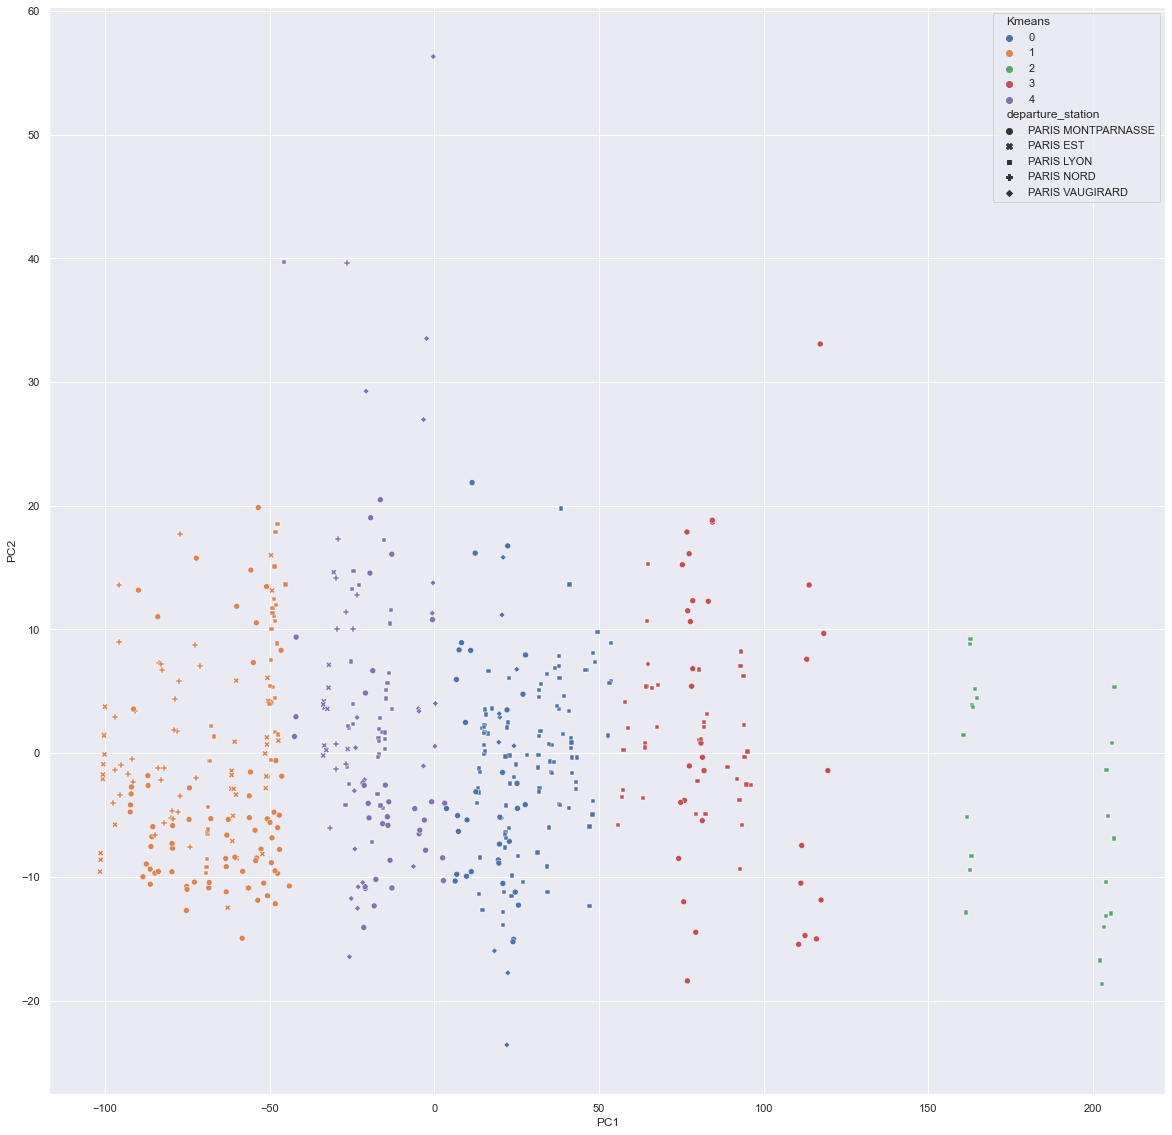

In [42]:
labels = pd.Series(cls.labels_, name='Kmeans')
sample0 = sample.drop(columns=['departure_station'])
sample0.reset_index(drop=True, inplace=True)
sample.reset_index(drop=True, inplace=True)
scatterplot_pca(data=sample0, hue=labels, style=sample.departure_station)

In [43]:
cls.labels_

array([1, 3, 1, 1, 1, 1, 1, 4, 1, 0, 1, 3, 0, 1, 3, 0, 0, 0, 3, 4, 1, 4,
       0, 4, 1, 4, 1, 0, 0, 0, 2, 3, 4, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 4,
       4, 0, 3, 1, 0, 0, 0, 3, 2, 3, 3, 3, 0, 4, 1, 1, 1, 1, 0, 4, 4, 2,
       0, 0, 4, 4, 0, 0, 3, 4, 4, 4, 3, 1, 1, 4, 2, 0, 4, 4, 0, 1, 1, 0,
       4, 1, 1, 1, 0, 0, 1, 4, 4, 0, 0, 0, 0, 3, 3, 4, 4, 1, 3, 1, 0, 4,
       0, 0, 2, 1, 0, 4, 1, 1, 3, 1, 0, 1, 1, 4, 0, 4, 1, 0, 1, 4, 1, 1,
       1, 4, 3, 1, 1, 0, 0, 4, 3, 0, 0, 1, 1, 4, 1, 1, 1, 4, 1, 2, 4, 0,
       1, 4, 1, 4, 2, 1, 4, 3, 1, 1, 1, 1, 0, 1, 3, 0, 4, 0, 4, 1, 4, 1,
       0, 0, 1, 0, 1, 4, 2, 2, 3, 3, 0, 0, 3, 0, 0, 1, 4, 1, 1, 1, 0, 4,
       3, 3, 0, 4, 0, 1, 0, 2, 1, 1, 1, 4, 1, 4, 1, 4, 4, 3, 1, 4, 0, 0,
       2, 4, 1, 1, 4, 4, 0, 4, 1, 2, 3, 1, 4, 1, 4, 1, 1, 4, 1, 4, 0, 0,
       0, 3, 1, 3, 0, 1, 1, 4, 0, 3, 3, 4, 4, 0, 1, 1, 4, 0, 3, 3, 0, 3,
       1, 3, 0, 0, 3, 0, 1, 2, 3, 4, 3, 1, 0, 4, 0, 3, 4, 4, 1, 1, 1, 0,
       0, 4, 1, 4, 1, 1, 1, 1, 1, 0, 2, 1, 3, 1, 4,

In [44]:
sample.departure_station

0      PARIS MONTPARNASSE
1      PARIS MONTPARNASSE
2      PARIS MONTPARNASSE
3      PARIS MONTPARNASSE
4               PARIS EST
              ...        
519            PARIS LYON
520    PARIS MONTPARNASSE
521    PARIS MONTPARNASSE
522    PARIS MONTPARNASSE
523    PARIS MONTPARNASSE
Name: departure_station, Length: 524, dtype: object

In [45]:
sample

,departure_station,journey_time_avg,avg_delay_late_on_arrival,delay_cause_traffic_management
0,PARIS MONTPARNASSE,94.334951,17.700260,0.148936
1,PARIS MONTPARNASSE,221.706161,35.714286,0.153846
2,PARIS MONTPARNASSE,97.607280,16.959341,0.210526
3,PARIS MONTPARNASSE,61.479876,15.905208,0.209302
4,PARIS EST,94.753472,41.657018,0.031250
...,...,...,...,...
519,PARIS LYON,95.624365,29.626667,0.103448
520,PARIS MONTPARNASSE,171.231481,18.647059,0.058824
521,PARIS MONTPARNASSE,99.136268,13.786343,0.277778
522,PARIS MONTPARNASSE,78.931818,18.482292,0.300000


In [46]:
sample.drop(columns=['departure_station'])

,journey_time_avg,avg_delay_late_on_arrival,delay_cause_traffic_management
0,94.334951,17.700260,0.148936
1,221.706161,35.714286,0.153846
2,97.607280,16.959341,0.210526
3,61.479876,15.905208,0.209302
4,94.753472,41.657018,0.031250
...,...,...,...
519,95.624365,29.626667,0.103448
520,171.231481,18.647059,0.058824
521,99.136268,13.786343,0.277778
522,78.931818,18.482292,0.300000


In [47]:
sample

,departure_station,journey_time_avg,avg_delay_late_on_arrival,delay_cause_traffic_management
0,PARIS MONTPARNASSE,94.334951,17.700260,0.148936
1,PARIS MONTPARNASSE,221.706161,35.714286,0.153846
2,PARIS MONTPARNASSE,97.607280,16.959341,0.210526
3,PARIS MONTPARNASSE,61.479876,15.905208,0.209302
4,PARIS EST,94.753472,41.657018,0.031250
...,...,...,...,...
519,PARIS LYON,95.624365,29.626667,0.103448
520,PARIS MONTPARNASSE,171.231481,18.647059,0.058824
521,PARIS MONTPARNASSE,99.136268,13.786343,0.277778
522,PARIS MONTPARNASSE,78.931818,18.482292,0.300000


In [48]:
sample0

,journey_time_avg,avg_delay_late_on_arrival,delay_cause_traffic_management
0,94.334951,17.700260,0.148936
1,221.706161,35.714286,0.153846
2,97.607280,16.959341,0.210526
3,61.479876,15.905208,0.209302
4,94.753472,41.657018,0.031250
...,...,...,...
519,95.624365,29.626667,0.103448
520,171.231481,18.647059,0.058824
521,99.136268,13.786343,0.277778
522,78.931818,18.482292,0.300000


In [49]:
sample.departure_station

0      PARIS MONTPARNASSE
1      PARIS MONTPARNASSE
2      PARIS MONTPARNASSE
3      PARIS MONTPARNASSE
4               PARIS EST
              ...        
519            PARIS LYON
520    PARIS MONTPARNASSE
521    PARIS MONTPARNASSE
522    PARIS MONTPARNASSE
523    PARIS MONTPARNASSE
Name: departure_station, Length: 524, dtype: object

In [50]:
data

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,NaN,10,...,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,2018,9,NaN,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,NaN,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0
5459,2018,9,NaN,PARIS MONTPARNASSE,TOURS,78.931818,176,0,NaN,24,...,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0
5460,2018,9,NaN,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,NaN,15,...,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,4.0,2.421278,0.0,0.0


In [51]:
data_paris

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
5,2017,9,National,PARIS LYON,BESANCON FRANCHE COMTE TGV,128.521053,191,1,NaN,18,...,0.111111,0.111111,0.222222,0.500000,0.000000,0.055556,15.0,35.796667,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,2018,9,International,LAUSANNE,PARIS LYON,219.325884,133,1,NaN,95,...,0.222222,0.111111,0.333333,0.222222,0.111111,0.000000,10.0,3.022727,4.0,1.0
5454,2018,9,National,LE MANS,PARIS MONTPARNASSE,61.261097,383,0,NaN,216,...,0.017544,0.228070,0.350877,0.192982,0.105263,0.105263,22.0,4.087946,4.0,1.0
5457,2018,9,National,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0


In [52]:
np.mean(data[data.arrival_station == 'ITALIE'].avg_delay_late_on_arrival)

43.56862886638914

In [53]:
np.mean(data[data.departure_station == 'ITALIE'].num_arriving_late / data[data.departure_station == 'ITALIE'].total_num_trips)

0.21718032903874251

In [54]:
data.columns

Index(['year', 'month', 'service', 'departure_station', 'arrival_station',
       'journey_time_avg', 'total_num_trips', 'num_of_canceled_trains',
       'comment_cancellations', 'num_late_at_departure',
       'avg_delay_late_at_departure', 'avg_delay_all_departing',
       'comment_delays_at_departure', 'num_arriving_late',
       'avg_delay_late_on_arrival', 'avg_delay_all_arriving',
       'comment_delays_on_arrival', 'delay_cause_external_cause',
       'delay_cause_rail_infrastructure', 'delay_cause_traffic_management',
       'delay_cause_rolling_stock', 'delay_cause_station_management',
       'delay_cause_travelers', 'num_greater_15_min_late',
       'avg_delay_late_greater_15_min', 'num_greater_30_min_late',
       'num_greater_60_min_late'],
      dtype='object')

In [56]:
np.count_nonzero(data_paris.service.isna())

0

In [57]:
data_paris

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
5,2017,9,National,PARIS LYON,BESANCON FRANCHE COMTE TGV,128.521053,191,1,NaN,18,...,0.111111,0.111111,0.222222,0.500000,0.000000,0.055556,15.0,35.796667,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,2018,9,International,LAUSANNE,PARIS LYON,219.325884,133,1,NaN,95,...,0.222222,0.111111,0.333333,0.222222,0.111111,0.000000,10.0,3.022727,4.0,1.0
5454,2018,9,National,LE MANS,PARIS MONTPARNASSE,61.261097,383,0,NaN,216,...,0.017544,0.228070,0.350877,0.192982,0.105263,0.105263,22.0,4.087946,4.0,1.0
5457,2018,9,National,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0
